# Dérivée et descente du gradient 

Ce cours a pour but de présenter l'algorithme de descente du gradient qui est un des piliers du deep learning. Pour cela, il est néssaire de faire quelques rappels sur la dérivée.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

## Compréhension intuitive de la dérivée

Définissons une fonction : $f(x) = 2x^2 - 3x + 4$

In [3]:
def f(x):
  return 2*x**2-3*x+4
f(3)

13

Traçons cette fonction sur un graphe avec matplotlib.

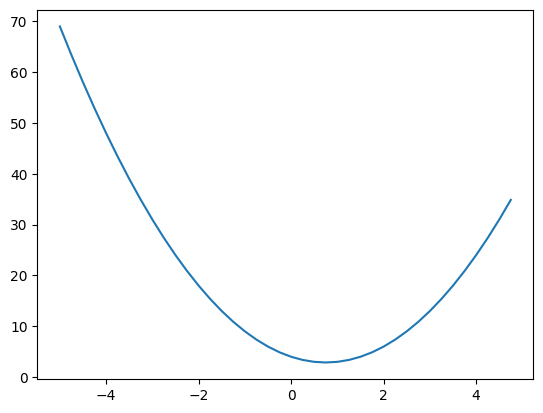

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

Le calcul de la dérivée permet de connaître la pente de la courbe en un point.  
Pour calculer la dérivée d'une fonction, on utilise la définition de la dérivée :   
$f'(x) = \lim_{h \to 0} \frac{f(x+h)-h}{h}$  
En prenant un h suffisament petit, on peut estimer la pente de la courbe numériquement.

**Note** : La pente de la courbe correspond au rapport entre la variation de $x$ et de $y$. Si quand on augmente $x$ de 1, y augment de 2 alors la pente de la courbe vaut 2.

In [4]:
h=0.0001
x=-1.0
print("Dérivée en x=-1 : ", (f(x+h)-f(x))/h)
x=2.0
print("Dérivée en x=2 : ", (f(x+h)-f(x))/h)

Dérivée en x=-1 :  -6.999800000002665
Dérivée en x=2 :  5.000200000004895


D'après le graphique, on voit bien que la pente de la courbe est négative en $x=-1$  et positive en $x=2$.  
Le **signe** de la dérivée permet de connaître la sens de la pente et la **valeur** de la dérivée permet de connaître l'intensité de la pente.  
On peut vérifier nos résultats à l'aide des [dérivées usuelles](https://fr.wikipedia.org/wiki/Table_de_d%C3%A9riv%C3%A9es_usuelles)  : Si $f(x)=2x²-3x+4$ alors $f'(x)=4x-3$  
On retrouve $f'(-1)=4 \times -1-3=-7 \approx -6.999800000002665$  
et $f'(2)=4 \times 2-3=5 \approx 5.000200000004895$    
Les résultats ne sont pas exacts car h n'est pas infinitésiment petit dans notre calcul numérique.

In [5]:
# On définit deriv_f = f'(x)
def deriv_f(x):
  return 4*x-3

## Les bases de l'optimisation par descente de gradient

Le but de l'optimisation va être de minimiser ou maximiser une fonction objectif qui correspond à l'objectif que l'on s'est fixé.   
Si notre but est de trouver le minimum de la fonction, il y a plusieurs façons de faire.   
Une première façon est de résoudre l'équation $f'(x)=0$ :  
$4x-3=0$  
$4x=3$  
$x=\frac{3}{4}$  
Ce calcul nous permet de trouver le minimum de $f(x)$ dans notre cas. Cependant, dans un cas général, résoudre $f'(x)=0$ permet de trouver les optimums (maximums et minimums) et pas forcément le minimum global.

Une seconde façon est d'utiliser une méthode d'optimisation que l'on appelle la **descente du gradient**. Pour appliquer cette méthode, on commence par se placer en un point quelconque, par exemple $x=2$.  
On calcule la dérivée $f'(2)=5$. La pente est positive ie si $x$ augmente alors $f(x)$ augmente et si $x$ diminue alors $f(x)$ diminue.   
Notre but est de trouver le minimum de $f(x)$, on va donc changer notre x en fonction de la pente et d'un facteur $\alpha$ = 0,1 (*learning rate*).  
On se retrouve avec $x_{new}=x - pente \times \alpha= 2-0.5=1.5$ et on peut recalculer la dérivée à notre nouveau point $f'(1.5)=4 \times 1.5-3=3$, la dérivée est encore positive, il faut donc à nouveau diminuer la valeur de $x$.  
La méthode d'optimisation de la descente du gradient consiste à créer une boucle qui va modifier la valeur de $x$ jusqu'à atteindre un minimum en se basant sur un facteur $\alpha$ et le signe de la dérivée. A noter que l'on tient compte de l'intensité de la pente dans notre calcul.    
On peut coder la descente du gradient de cette manière.

In [6]:
# Descente du gradient
x=2.0 # valeur aléatoire de x
alpha=0.01 # pas
iterations=250 # nombre d'itérations

for i in range(iterations):
  grad=deriv_f(x)
  if (grad>0):
    x=x-alpha
  elif(grad<0):
    x=x+alpha
  else:
    print("minimum found YAY, x = ",x)
print("approximate minimum found YAY, x = ",x)

approximate minimum found YAY, x =  0.7599999999999989


On retrouve $x \approx \frac{3}{4}$. Avec un pas plus faible ($\alpha$) et plus d'itérations, on peut retrouver une valeur encore plus précise.

## La règle de la chaîne 

Avant de passer aux choses sérieuses, il est nécessaire de faire un dernier rappel mathématique d'une importance capitale pour l'apprentissage profond. C'est cette règle qui permet l'entraînement des paramètres des couches "cachées" du réseau.  
Il s'agit du théorème de dérivation des fonctions composées (plus souvent appelé règle de la chaîne ou chain-rule en anglais) qui énonce le principe suivant :   
Si une variable y dépend d'une seconde variable u, qui dépend à son tour d'une variable x alors : 
$\frac{dy}{dx}=\frac{dy}{du}\cdot\frac{du}{dx}$  


Reprenons un exemple de descente du gradient sur des fonctions qui dépendent les unes des autres.  
$u=2x²-x-2$  
$y=3u+1$  
$\frac{dy}{dx}=\frac{dy}{du}\cdot\frac{du}{dx}$ avec $\frac{dy}{du}=3$ et $\frac{du}{dx}=2x-1$  
$\frac{dy}{dx}=3(2x-1)$  
$\frac{dy}{dx}=6x-3$  
On sait maintenant comment la variation de $x$ impacte $y$ et on peut appliquer notre algorithme de descente du gradient.


In [7]:
x=2.0
def deriv_y_x(x):
  return 6*x-3
for i in range(iterations):
  grad=deriv_y_x(x)
  if (grad>0):
    x=x-alpha
  elif(grad<0):
    x=x+alpha
  else:
    print("minimum found YAY, x = ",x)
print("approximate minimum found YAY, x = ",x)

approximate minimum found YAY, x =  0.49999999999999867


## Optimisation de plusieurs variables 

Jusqu'à présent, on s'est contenté de trouver le minimum d'une fonction contenant une seule variable $x$.  
Un avantage des méthodes d'optimisation est que l'on peut optimiser plusieurs variables simultanément avec la descente du gradient. Pour cela, il faut calculer la dérivée par rapport à chacune des variables.   

Pour notre exemple, prenons 3 variables a, b et c dans le modèle suivant :   
$u=3a²-2a+b²+1$  
$y=2u+c$  
Pour pouvoir appliquer la descente du gradient, on doit calculer $\frac{dy}{da}$, $\frac{dy}{db}$ et $\frac{dy}{dc}$  
Pour cela les deux premiers, on utilise la règle de la chaîne ce qui nous donne :   
- Pour la varible a :  
$\frac{dy}{da} = \frac{dy}{du}\cdot\frac{du}{da}$    
$\frac{dy}{da} = 2(6a-2) = 12a-4$   

- Pour la variable b :  
$\frac{dy}{da} = \frac{dy}{du}\cdot\frac{du}{db}$ 
$\frac{dy}{da} = 2(2b) = 4b$   

- Pour la varible c :  
$\frac{dy}{dc}=1$  
A partir de ces équations, on peut appliquer la descente du gradient.

In [8]:
def deriv_y_a(a):
  return 12*a-4
def deriv_y_b(b):
  return 4*b
def deriv_y_c(c):
  return 1

a=1.0
b=1.0
c=1.0
alpha=0.05
def deriv_y_x(x):
  return 6*x-3
for i in range(iterations):
  grad_a=deriv_y_a(a)
  grad_b=deriv_y_b(b)
  grad_c=deriv_y_c(b)
  if (grad_a>0):
    a=a-alpha
  else:
    a=a+alpha
  if (grad_b>0):
    b=b-alpha
  else:
    b=b+alpha
  if (grad_c>0):
    c=c-alpha
  else:
    c=c+alpha
print("approximate minimum found YAY, a = "+str(a)+" b = "+str(b)+" c = "+str(c))

approximate minimum found YAY, a = 0.29999999999999966 b = -3.191891195797325e-16 c = -11.50000000000003


On a pu trouver des valeurs qui minimisent la valeur de $y$. La paramètre c va tendre vers moins l'infini avec beaucoup d'itérations tandis que le paramètre b va valoir 0 et la paramètre a va valoir 0.3.